In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
import glob
import os

In [59]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 16

# Classical Set Redundancy Compression

## CIFAR 10

In [27]:
cifar10 = np.array([186214115])

In [29]:
cifar_png = np.load("./Saved_datas/CIFAR10_png_size.npy")
print(cifar_png)
cifar_png = cifar10 / cifar_png
cifar_png

148365449


array([1.25510431])

## Min-Max Differential

In [33]:
mmdf_kmeans_png = []
for k in [10, 20, 30, 40, 50, 60, 70, 80, 90]:
    name = "./Saved_datas/mmdf_KMeans" + str(k) + "_png_size.npy"
    mmdf_kmeans_png.append(np.load(name))
mmdf_kmeans_png = np.array(mmdf_kmeans_png).squeeze()

mmdf_kmeans_png = cifar10 / mmdf_kmeans_png
mmdf_kmeans_png


array([0.55621144, 0.56047334, 0.55968513, 0.5589515 , 0.55847155,
       0.55782484, 0.55738248, 0.55696166, 0.55658073])

Min-Max Differential and Delta

In [35]:
mmdf_delta_kmeans_png = []
for k in [10, 20, 30, 40, 50, 60, 70, 80, 90]:
    name = "./Saved_datas/mmdf_deltaKMeans" + str(k) + "_png_size.npy"
    mmdf_delta_kmeans_png.append(np.load(name))
mmdf_delta_kmeans_png = np.array(mmdf_delta_kmeans_png).squeeze()

mmdf_delta_kmeans_png = cifar10 / mmdf_delta_kmeans_png
mmdf_delta_kmeans_png

array([1.73552559, 1.85408277, 1.82776188, 1.80856916, 1.79365927,
       1.77951275, 1.76359988, 1.75267679, 1.7443504 ])

Delta and Min-Max differential

In [36]:
delta_mmdf_kmeans_png = []
for k in [10, 20, 30, 40, 50, 60, 70, 80, 90]:
    name = "./Saved_datas/delta_mmdfKMeans" + str(k) + "_png_size.npy"
    delta_mmdf_kmeans_png.append(np.load(name))
delta_mmdf_kmeans_png = np.array(delta_mmdf_kmeans_png).squeeze()

delta_mmdf_kmeans_png = cifar10 / delta_mmdf_kmeans_png
delta_mmdf_kmeans_png


array([1.11993808, 1.14429901, 1.13664191, 1.13343536, 1.129019  ,
       1.12738774, 1.12456343, 1.12234285, 1.1211489 ])

Only Delta

In [38]:
delta_png = np.load("./Saved_datas/delta_png_size.npy")
delta_png = np.array(delta_png).squeeze()
delta_png = cifar10 / delta_png
delta_png 

array([1.95696275])

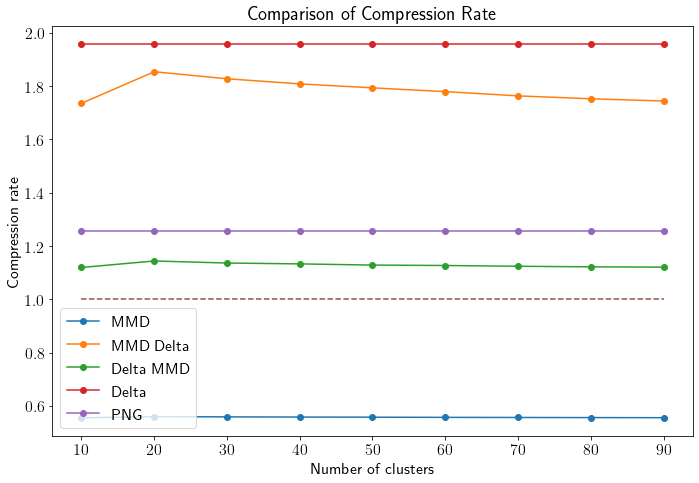

In [60]:
n_clusters = np.arange(10, 91, 10)
x = np.ones(len(n_clusters))
plt.figure(figsize=(10,7))
plt.plot(n_clusters, mmdf_kmeans_png, "-o", label = "MMD")
plt.plot(n_clusters, mmdf_delta_kmeans_png, "-o", label = "MMD Delta")
plt.plot(n_clusters, delta_mmdf_kmeans_png, "-o", label = "Delta MMD")
plt.plot(n_clusters, delta_png * x, "-o", label = "Delta")
plt.plot(n_clusters, cifar_png * x, "-o", label = "PNG")
plt.plot(n_clusters, x, "--")
plt.title("Comparison of Compression Rate")
plt.xlabel("Number of clusters")
plt.ylabel("Compression rate")
plt.legend(loc = 3)
plt.tight_layout()
plt.savefig("./Image/rate_mmd.pdf")
plt.show()

## Min-Max Predictive